
# 🧪 Model Zoo: Comparative Evaluation of Classifiers

This notebook loads and evaluates multiple models (Logistic Regression, Random Forest, XGBoost, CatBoost),
optionally showing performance metrics and visualizations.

Set `ShowOutput = True` below to display plots.
## Included Models
- Logistic Regression
- Random Forest
- XGBoost
- CatBoost

Models are expected to be pre-trained in their respective notebooks.


In [10]:
ShowOutput = True

In [11]:

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Number of rows with a 1 in class_ASD: 48
Number of rows with a 0 in class_ASD: 152

Final Model Performance on Holdout Set:
ROC-AUC: 0.8945
PR-AUC: 0.6623
F1 Score: 0.6216
Matthews Correlation Coefficient: 0.5185


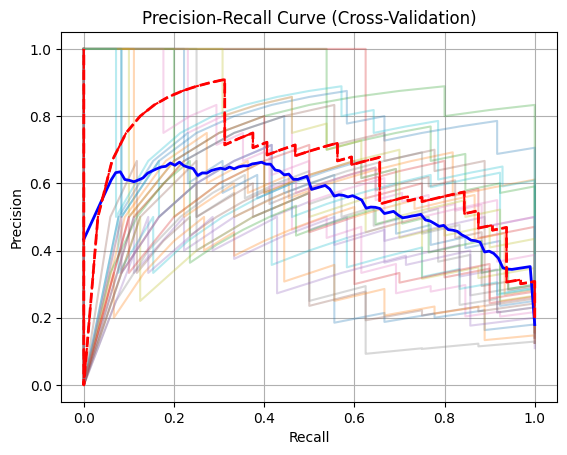

Best hyperparameters: {'n_estimators': 259, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'class_weight': 'balanced'}


ValueError: Found input variables with inconsistent numbers of samples: [800, 640]

ValueError: Found input variables with inconsistent numbers of samples: [800, 640]

In [12]:

# Load all model notebooks
%run SupervisedModels/SupervisedLogisticRegression.ipynb
#%run SupervisedModels/SupervisedRandomForest.ipynb
%run OptimizedRandomForest.ipynb
%run SupervisedModels/SupervisedXGBoost.ipynb
#%run SupervisedModels/SupervisedCatBoost.ipynb


In [ ]:

def evaluate_model(model, name, X, y, threshold=0.5, show=False):
    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    roc_auc = roc_auc_score(y, y_proba)
    f1 = f1_score(y, y_pred)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)

    if show:
        print(f"### {name} ###")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        ConfusionMatrixDisplay.from_predictions(y, y_pred)
        plt.title(f"Confusion Matrix - {name}")
        plt.show()

    return {
        "Model": name,
        "ROC AUC": roc_auc,
        "F1 Score": f1,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    }


### Logistic Regression ###
ROC AUC: 0.8440
F1 Score: 0.3879
Accuracy: 0.3688
Precision: 0.2406
Recall: 1.0000


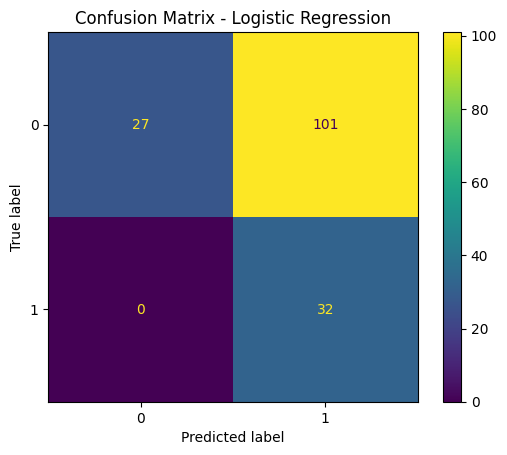

### Random Forest ###
ROC AUC: 0.4713
F1 Score: 0.3333
Accuracy: 0.2000
Precision: 0.2000
Recall: 1.0000


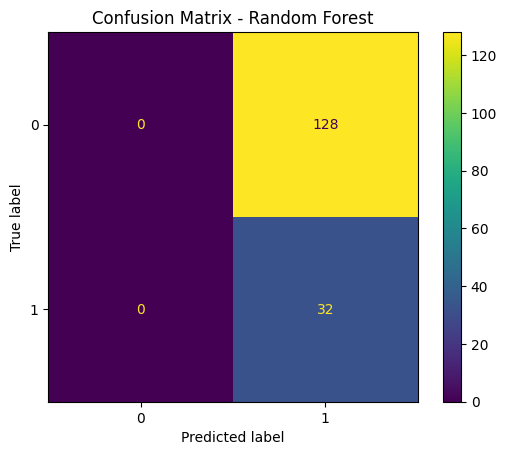

### XGBoost ###
ROC AUC: 0.3909
F1 Score: 0.3333
Accuracy: 0.2000
Precision: 0.2000
Recall: 1.0000


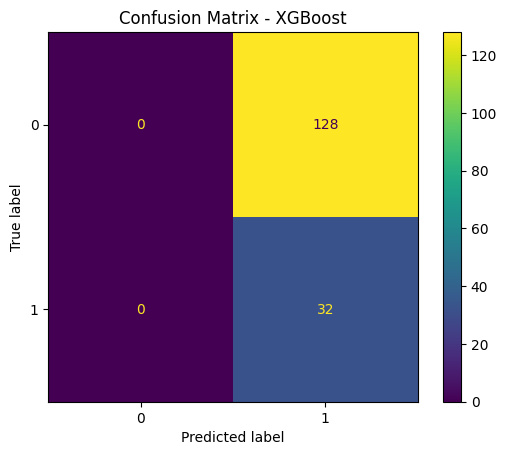

### CatBoost ###
ROC AUC: 0.7332
F1 Score: 0.3333
Accuracy: 0.2000
Precision: 0.2000
Recall: 1.0000


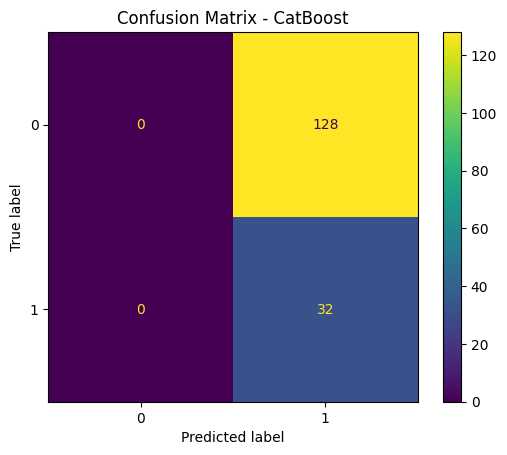

,ROC AUC,F1 Score,Accuracy,Precision,Recall
Model,,,,,
Logistic Regression,0.843994,0.387879,0.36875,0.240602,1.0
Random Forest,0.471313,0.333333,0.20000,0.200000,1.0
XGBoost,0.390869,0.333333,0.20000,0.200000,1.0
CatBoost,0.733154,0.333333,0.20000,0.200000,1.0


In [ ]:

# Assuming X_test and y_test are already loaded in the model notebooks
results = []
results.append(evaluate_model(lr_model, "Logistic Regression", X_holdout, y_holdout, threshold=0.5, show=ShowOutput))
results.append(evaluate_model(rf_model, "Random Forest", X_holdout, y_holdout, threshold=0.5, show=ShowOutput))
results.append(evaluate_model(xgb_model, "XGBoost", X_holdout, y_holdout, threshold=0.5, show=ShowOutput))
results.append(evaluate_model(cb_model, "CatBoost", X_holdout, y_holdout, threshold=0.5, show=ShowOutput))

results_df = pd.DataFrame(results).set_index("Model")
results_df
